In [1]:
from keras.models import model_from_json
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD

import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sn
import pandas as pd

Using TensorFlow backend.


In [2]:
img_width, img_height = 224, 224
batch_size = 32
n_classes = 196
test_path = 'data/test/'

test_image_dataset = 'dataset/cars_test/'

In [3]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

validation_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 1603 images belonging to 196 classes.


In [4]:
with open('models/vgg16/vgg16_finalModel.json', 'r') as f:
    model = model_from_json(f.read())

model.load_weights('models/vgg16/vgg16_finalModel.h5')

sgd = SGD(lr=0.0001, decay=1e-4, momentum=0.9, nesterov=True)
# sgd = Adam(lr=0.0001, decay=1e-4)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [5]:
model.evaluate_generator(validation_generator, steps=None, max_queue_size=10, workers=1, use_multiprocessing=False)

[1.0351383914370427, 0.7373674360945756]

In [6]:
pred = model.predict_generator(validation_generator, steps=None, max_queue_size=10, workers=1, use_multiprocessing=False, verbose=1)
predicted = np.argmax(pred, axis=1)

51/51 [==============================] - 7s 136ms/step


In [7]:
df = pd.read_csv('dataset/car_train.csv')
class_df = pd.read_csv('dataset/classess.csv')

Confusion Matrix


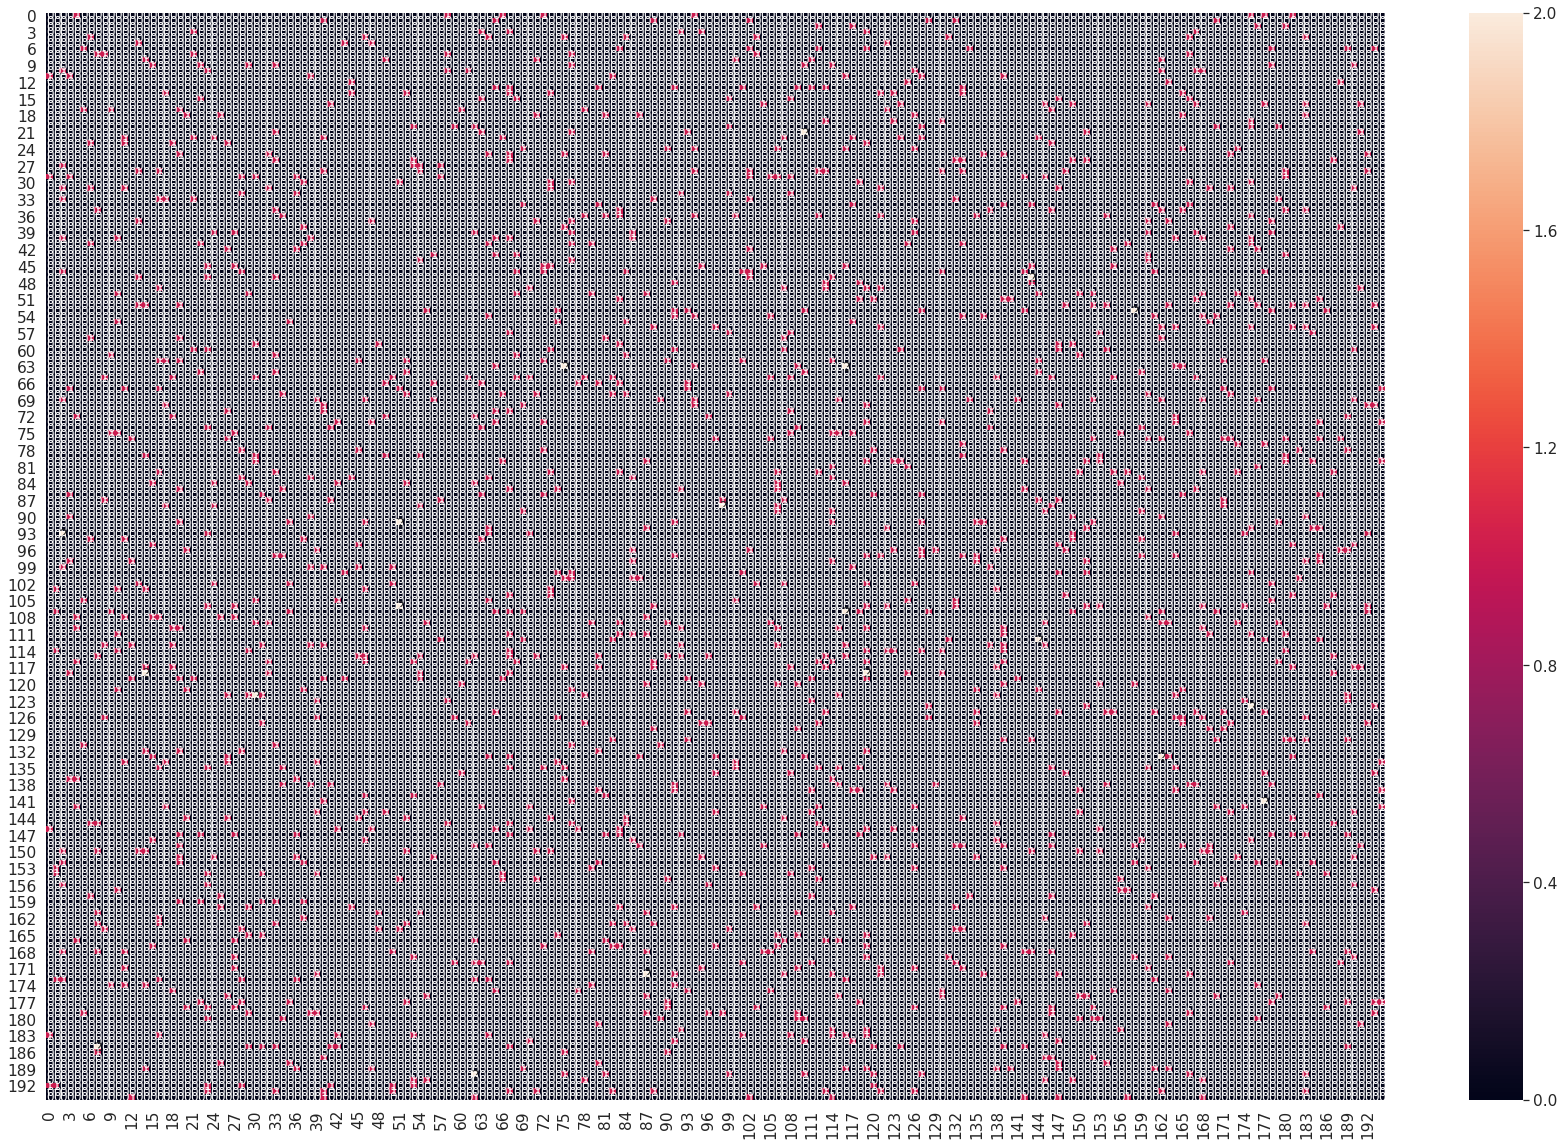


Classification Report
                                                        precision    recall  f1-score   support

                                   Audi TTS Coupe 2012       0.00      0.00      0.00         8
                                   Acura TL Sedan 2012       0.00      0.00      0.00         7
                            Dodge Dakota Club Cab 2007       0.00      0.00      0.00         4
                      Hyundai Sonata Hybrid Sedan 2012       0.00      0.00      0.00         7
                   Ford F-450 Super Duty Crew Cab 2012       0.00      0.00      0.00         9
                            Geo Metro Convertible 1993       0.00      0.00      0.00         4
                                Dodge Journey SUV 2012       0.00      0.00      0.00         9
                              Dodge Charger Sedan 2012       0.09      0.14      0.11         7
                          Mitsubishi Lancer Sedan 2012       0.00      0.00      0.00         6
                

/home/superceed1/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/superceed1/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/home/superceed1/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/superceed1/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', ave

In [8]:
print('Confusion Matrix')
cm = confusion_matrix(validation_generator.classes, np.argmax(pred, axis=1))
plt.figure(figsize = (30,20))
sn.set(font_scale=1.4) #for label size
sn.heatmap(cm, annot=True, annot_kws={"size": 12}) # font size
plt.show()
print()
print('Classification Report')
print(classification_report(validation_generator.classes, predicted, target_names=df['class'].unique(), labels=range(len(df['class'].unique()))))

'Suzuki Aerio Sedan 2007'

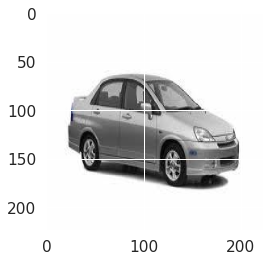

In [9]:
import cv2
img = cv2.imread('dataset/cars_test/00001.jpg')
img = cv2.resize(img, (224, 224))
plt.imshow(img)
img = img / 255.

img = np.expand_dims(img, axis=0)

tst = np.argmax(model.predict(img))

class_df['class'][tst]

/home/superceed1/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


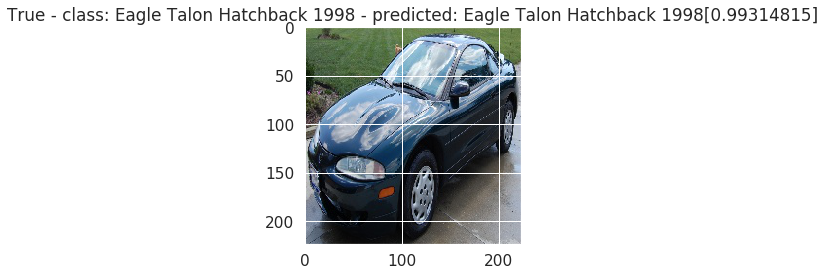

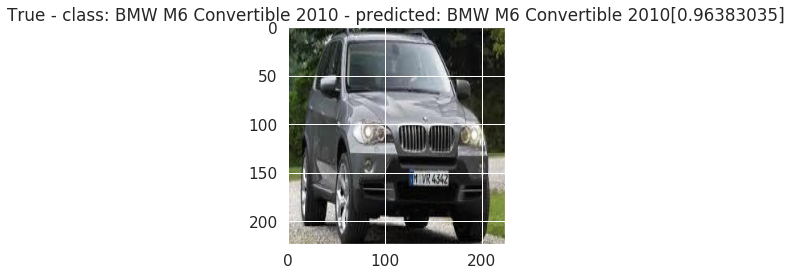

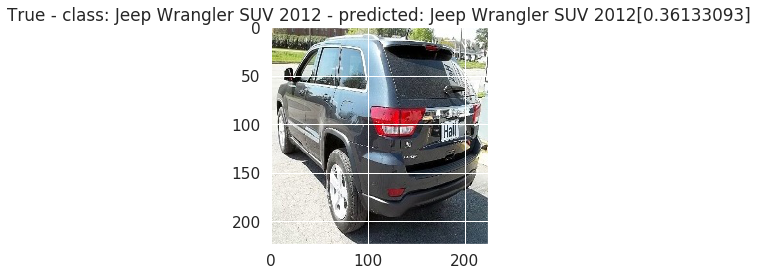

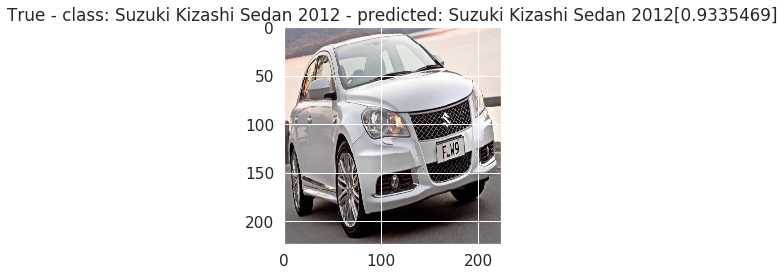

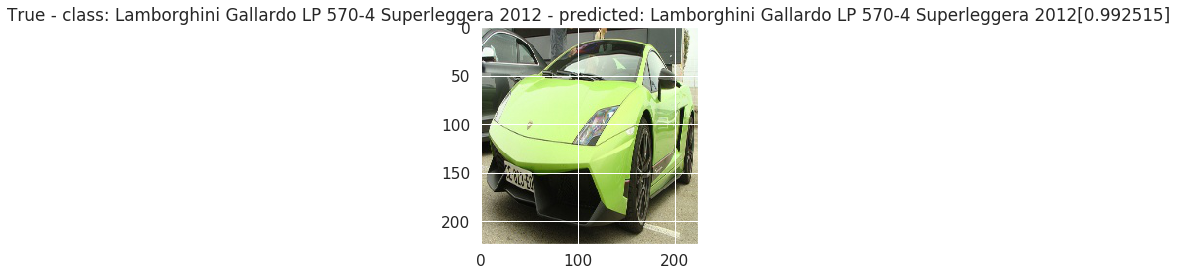

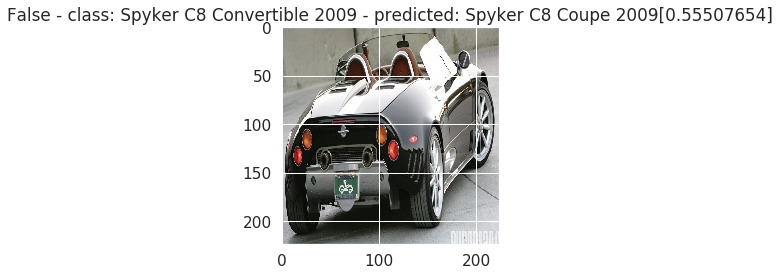

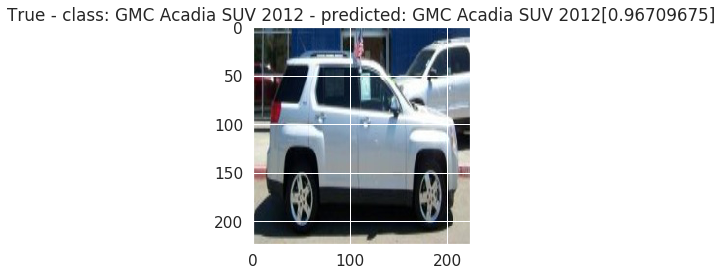

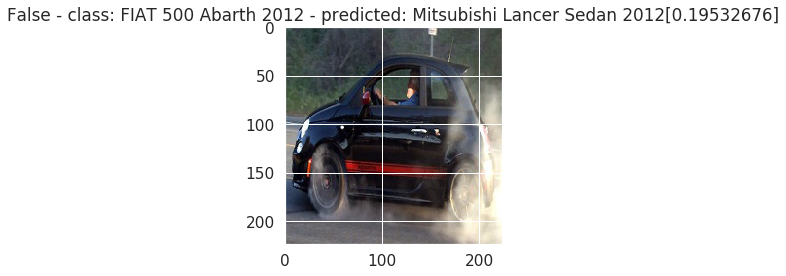

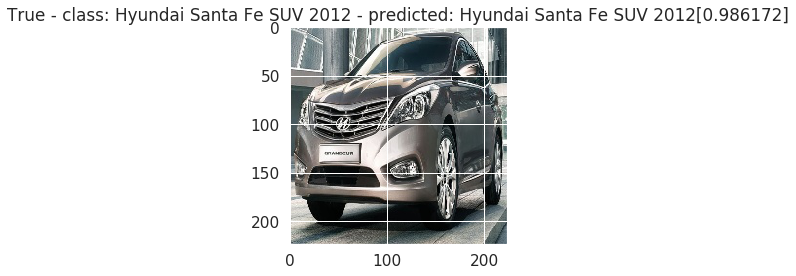

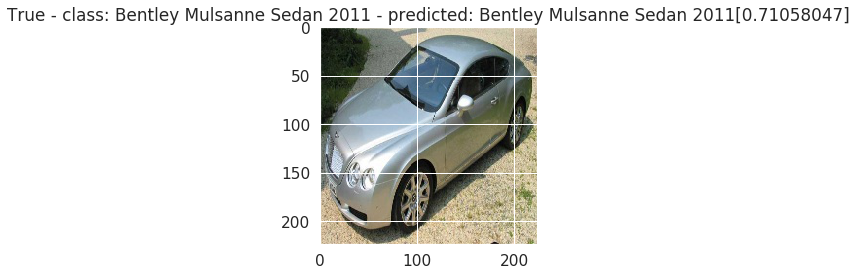

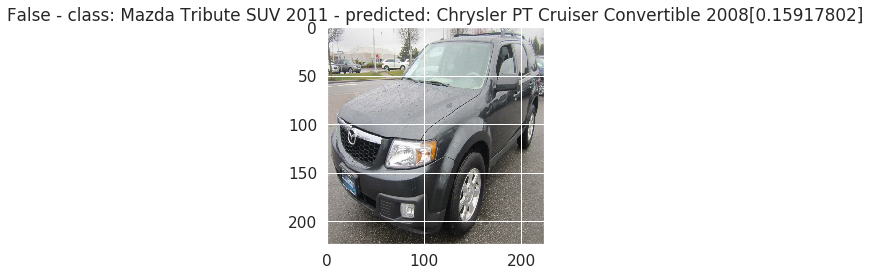

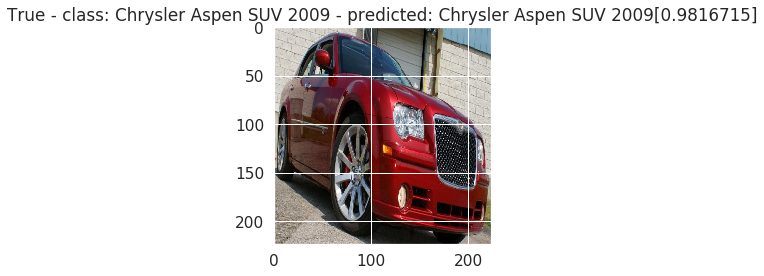

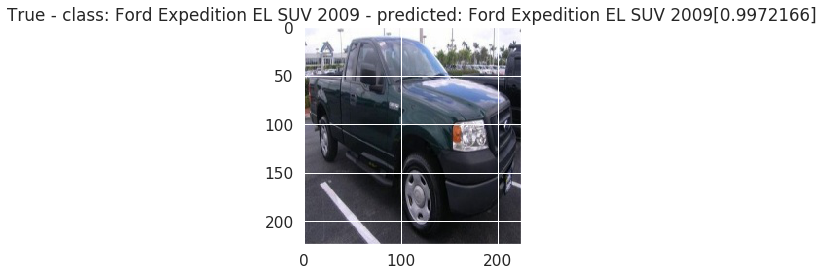

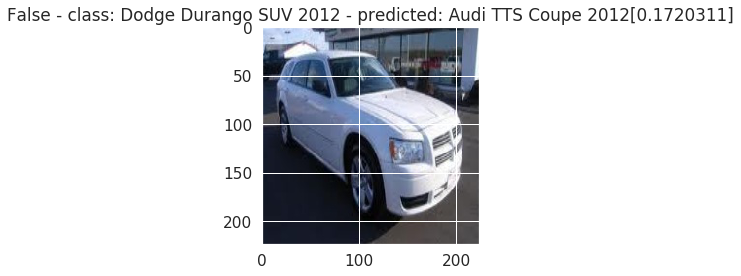

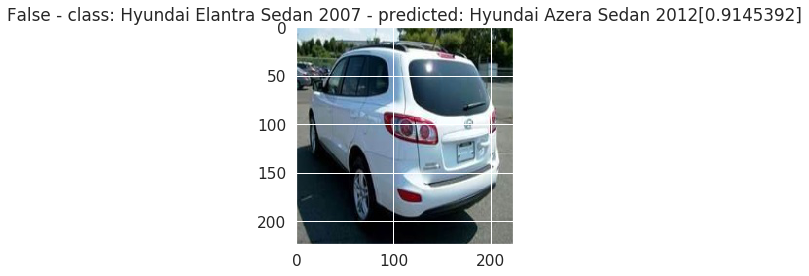

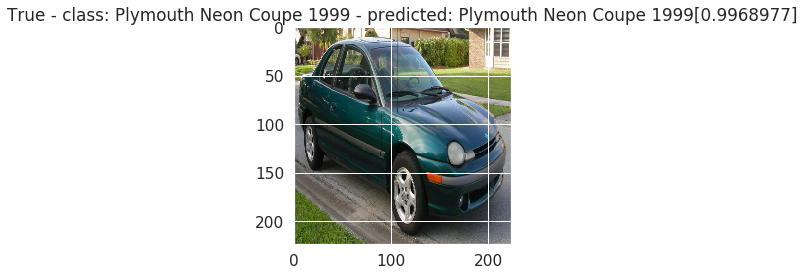

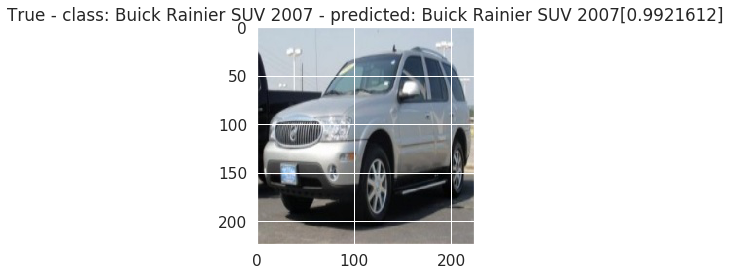

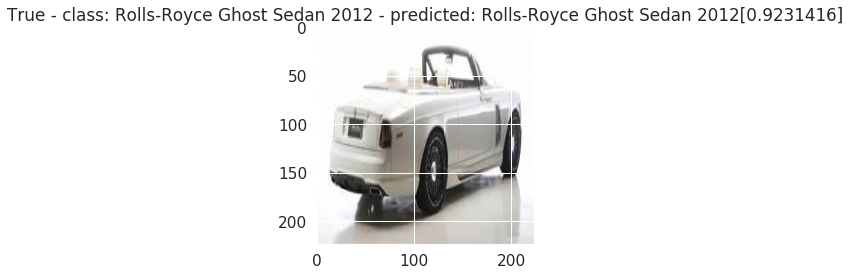

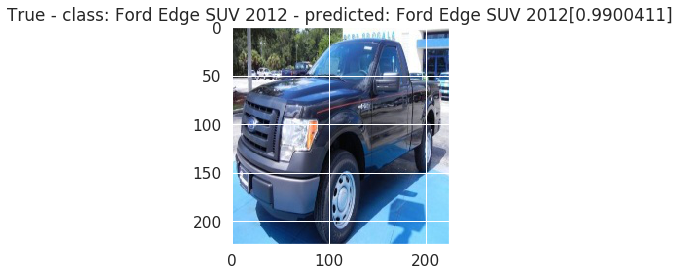

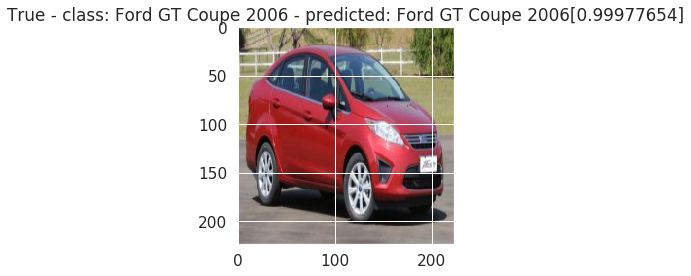

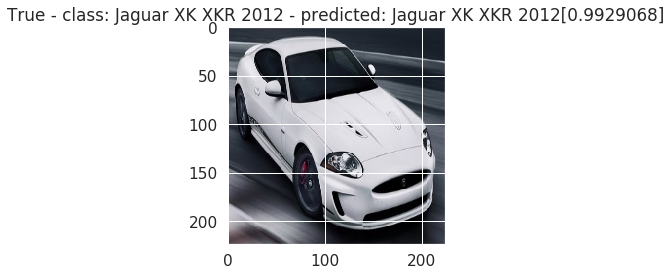

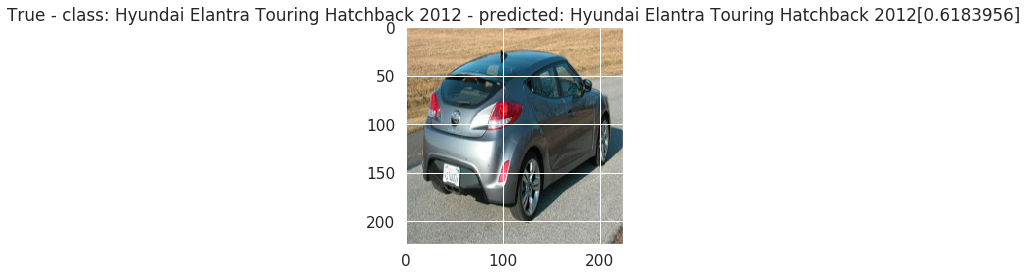

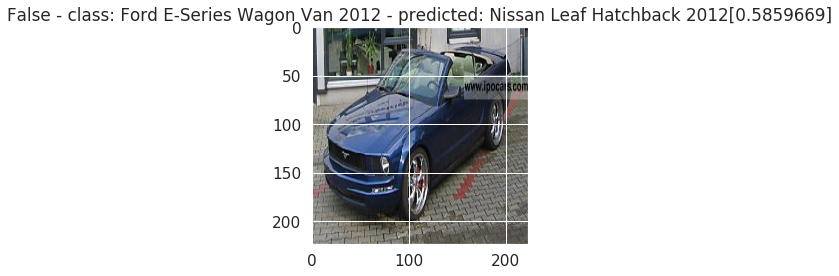

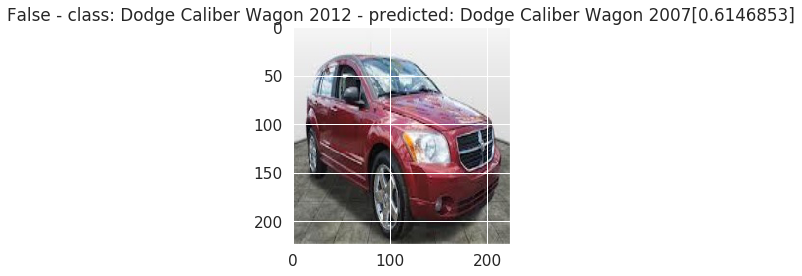

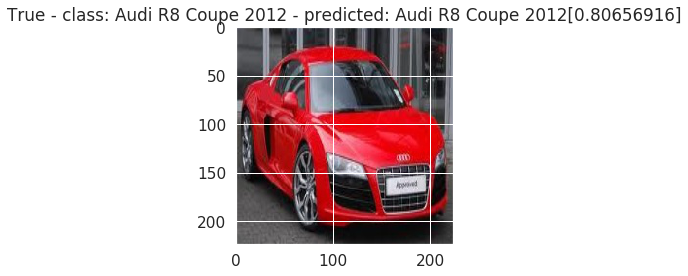

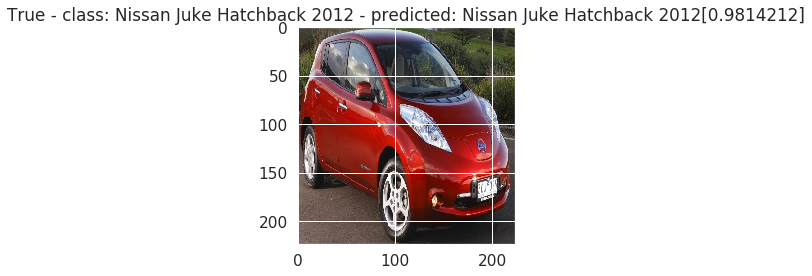

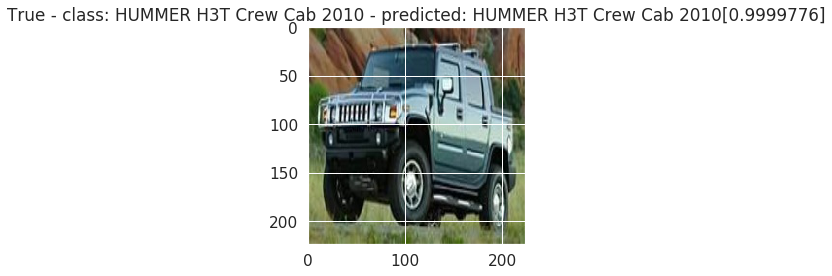

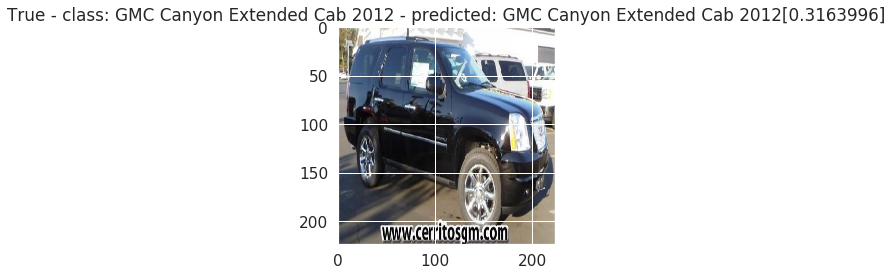

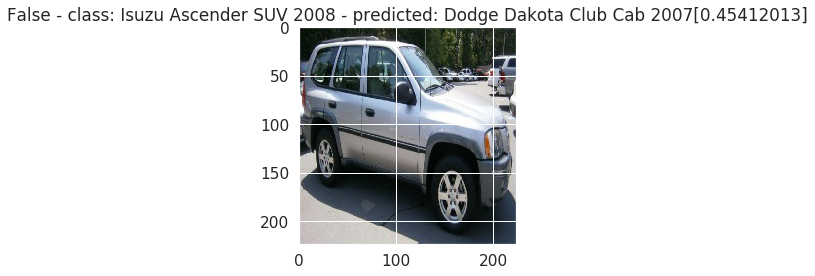

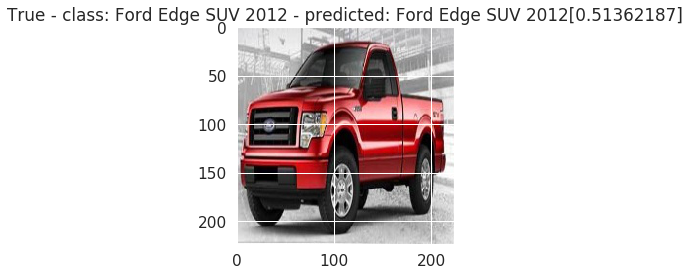

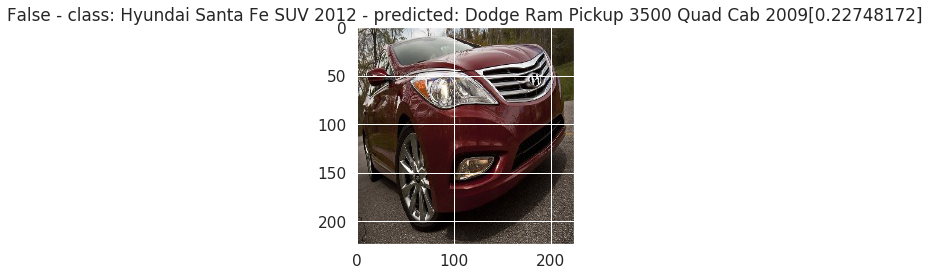

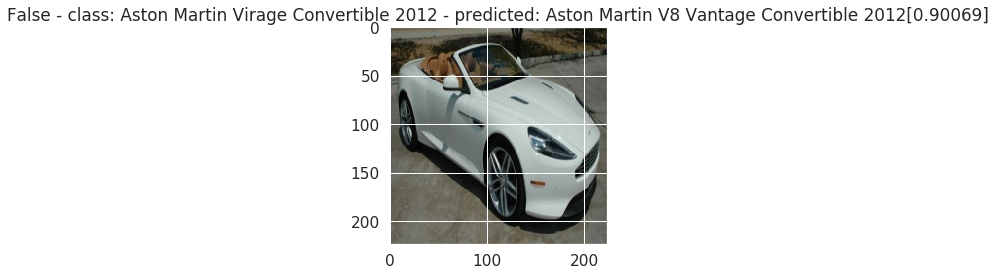

In [10]:
image_batch, classes_batch = next(validation_generator)
predicted_batch = model.predict(image_batch)

is_predicted_true = []

for k in range(0,image_batch.shape[0]):
    image = image_batch[k]
    pred = predicted_batch[k]
    the_pred = np.argmax(pred)
    predicted = class_df['class'][the_pred]
    val_pred = max(pred)
    the_class = np.argmax(classes_batch[k])
    value = class_df['class'][np.argmax(classes_batch[k])]
    plt.figure(k)
    isTrue = (the_pred == the_class)
    
    if isTrue:
        is_predicted_true.append(isTrue)
    
    plt.title(str(isTrue) + ' - class: ' + value + ' - ' + 'predicted: ' + predicted + '[' + str(val_pred) + ']')
    plt.imshow(image)

In [11]:
print('Predicted correct {} out of {} validation'.format(len(is_predicted_true), image_batch.shape[0]))

Predicted correct 22 out of 32 validation
